# LAB1: Simulation of Chemical Reaction (Continuous System)

## Name : Prabin Sharma Poudel
## Roll no : THA076BCT027

## Experiment no : 1 (Lab 1)

## Aim :
To develop a mathematical model of a continuous system and simulate it.

## OBJECTIVES :
  1. To develop a mathematical model for a continuous system
  2. To determine the state of the system by finding out the concentration of reactants and products at any given instant of time

# THEORY:

Chemical reactions exhibit dynamic equilibriumm, which means that a combination reaction is also accomplished by the reverse process of decomposition reaction. At the steady state the rates of the forward and the backward reaction is same. Lets take an example where the two chemicals react together to produce a third chemical:

Ch1 + Ch2  --------------> Ch3

The rate of reaction depends on a large number of factors such as:
1. The amount of Ch1 and Ch2 mixed.
2. The temperature
3. The pressure
4. The humidity
5. Catalyst used.

Lets neglect the effect of other factors so that we can narrow the overall process down to simple equations governing it:
$$\frac{dC1}{dt} = K2C3 - K1C1C2.......(i)$$<br>
$$\frac{dC2}{dt} = K2C3 - K1C1C2........(ii)$$<br>
$$\frac{dC3}{dt} = 2K1C1C2 - 2K2C3........(iii)$$<br>

where K1 an K2 are constants.

As soon as the chemicals Ch1 and Ch2 are mixed, the reaction starts and the amount of C1,C2,C3 in the mixture goes on changing as the time progresses. The simulation of the reaction will determine the state of the system, i.e, value of quantities C1,C2,C3 at different points in time. Starting at zero time, a very small increment of time is taken in each step. It is assumed to be so small, that all changes in the mixture can be taken to occur at the end of each increment.
If C1(t), C2(t), and C3(t) are the quantities to there chemicals at time t, then at time t+Δt, the quantities are:
<br>
$$C1(t+\Delta t) = C1(t) + [K2C3(t) - K1C1(t)C2(t)]\Delta t$$<br>
$$C2(t+\Delta t) = C2(t) + [K2C3(t) - K1C1(t)C2(t)]\Delta t$$<br>
$$C3(t+\Delta t) = C3(t) + [2K1C1(t)C2(t) - 2K2C3(t)]\Delta t$$<br>

The amount of C1, C2, C3 is exactly what is to be simulated by plotting the concentration with respect to time. At each increment in time, we can either count the number of steps taken or check the attained time with the prescried simulatioin run time.

## Functions and Libraries used:
1. Numpy:
      
        A powerful numerical computing library for Python that provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on them.
2. Matplotlib:

        A 2D plotting library for Python that enables the creation of high-quality static, animated, and interactive visualizations in Python.
3. Ipywidgets:

         Ipywidgets, or IPython widgets, is a library that provides interactive HTML widgets for Jupyter notebooks, enabling the creation of dynamic and user-friendly graphical interfaces for data exploration and manipulation within the notebook environment.  
    i. Interact:

        'interact' is a function in the ipywidgets library that automatically generates interactive user interfaces (UI) controls for exploring and manipulating functions and parameters.

    ii. FloatSlider:

        'FloatSlider' is a widget in ipywidgets that provides an interactive slider control for floating-point values, allowing users to easily adjust parameters with continuous values.

# DISCUSSION:
In this section the code is presented to simulate the reaction.
First, we draw a simple static plot to show the concentration changing with time, showing how the reaction is a continuous system.

Then we try to spice our code just a little bit to make the plot more interactive, where we the users can set different C1,C2,C3, K1, K2, K3 and see how the curve changes, without changing the code.

Below are ther two implementations of the same chemical reaction:

**1. Simple Plot**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def reaction(i1, i2, i3, K1, K2, dt, T):
    C1_values, C2_values, C3_values, time_values = [i1], [i2], [i3], [0]           #arrays to store concentrations and time
    t = 0
    while t < T:                                                                   #Simulation loop
        # concentration difference calculated using differential equations given by the question
        dC1_dt = K2 * C3_values[-1] - K1 * C1_values[-1] * C2_values[-1]
        dC2_dt = K2 * C3_values[-1] - K1 * C1_values[-1] * C2_values[-1]
        dC3_dt = 2 * K1 * C1_values[-1] * C2_values[-1] - 2 * K2 * C3_values[-1]

        #Update the concentration
        C1_new = C1_values[-1] + dC1_dt * dt
        C2_new = C2_values[-1] + dC2_dt * dt
        C3_new = C3_values[-1] + dC3_dt * dt

        # Append the arrays
        C1_values.append(C1_new)
        C2_values.append(C2_new)
        C3_values.append(C3_new)
        t += dt
        time_values.append(t)

    return time_values, C1_values, C2_values, C3_values

In [1]:
i1, i2, i3 = 6,5,1
K1, K2 = 0.1,0.2
dt = 0.1
T = 4

In [ ]:
time, C1, C2, C3 = reaction(i1,i2,i3,K1,K2,dt,T)

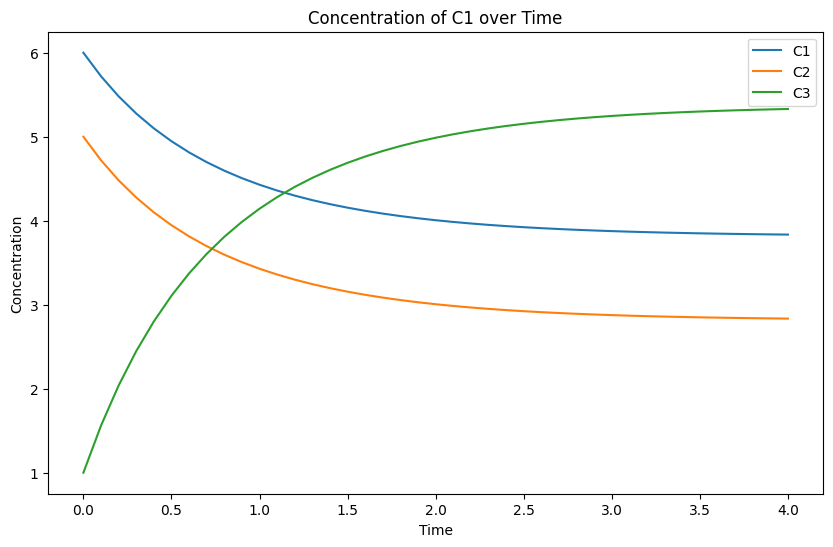

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time, C1, label='C1')
plt.plot(time, C2, label='C2')
plt.plot(time, C3, label='C3')
plt.title('Concentration of C1 over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

**2. Interactive Plot**

In [ ]:
!pip install ipywidgets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

In [ ]:
def simulate_reaction(initial_conditions, rate_constants, simulation_time, time_step):
    c1, c2, c3 = initial_conditions
    k1, k2, k3 = rate_constants
    time_values = [0]
    c1_values = [c1]
    c2_values = [c2]
    c3_values = [c3]

    while time_values[-1] < simulation_time:
        dc1 = k2 * c3 - k1 * c1 * c2
        dc2 = k2 * c3 - k1 * c1 * c2
        dc3 = 2 * k1 * c1 * c2 - 2 * k2 * c3
        c1 += dc1 * time_step
        c2 += dc2 * time_step
        c3 += dc3 * time_step
        time_values.append(time_values[-1] + time_step)
        c1_values.append(c1)
        c2_values.append(c2)
        c3_values.append(c3)

    return time_values, c1_values, c2_values, c3_values

In [ ]:
def plot_reaction_interactive(c1=1, c2=2, c3=3, k1=0.07, k2=0.01, k3=1):
    initial_conditions = [c1, c2, c3]
    rate_constants = [k1, k2, k3]
    simulation_time = 10
    time_step = 0.1

    time, amount_c1, amount_c2, amount_c3 = simulate_reaction(
        initial_conditions, rate_constants, simulation_time, time_step
    )

    plt.figure(figsize=(10, 6))
    plt.plot(time, amount_c1, label='c1', color='red', marker="*")
    plt.plot(time, amount_c2, label='c2', color='blue', marker="+")
    plt.plot(time, amount_c3, label='c3', color='green', marker="o")
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.title('Amount of reactants during a chemical reaction')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
interact(plot_reaction_interactive,
         c1=FloatSlider(min=0, max=5, step=0.1, value=1),
         c2=FloatSlider(min=0, max=5, step=0.1, value=2),
         c3=FloatSlider(min=0, max=5, step=0.1, value=3),
         k1=FloatSlider(min=0, max=1, step=0.01, value=0.07),
         k2=FloatSlider(min=0, max=1, step=0.01, value=0.01),
         k3=FloatSlider(min=0, max=1, step=0.1, value=1))


interactive(children=(FloatSlider(value=1.0, description='c1', max=5.0), FloatSlider(value=2.0, description='c…

<function __main__.plot_reaction_interactive(c1=1, c2=2, c3=3, k1=0.07, k2=0.01, k3=1)>

# RESULTS:
Keeping the following intital conditions:

i1, i2, i3 = 6,5,1
K1, K2 = 0.1,0.2
dt = 0.1
T = 4

the curve is obtained where the concentration of C1 and C2 (reactants) kept on decreasing and the concentration of the product (C3) kept on increasing.

Note that if the amount  of product were to be kept more than the reactants then the reverse would happen. i.e, the concentration of C1 and C2 would go on increasing while the concentration of C3 would go on decreasing.

#CONCLUSION:
The mathematical model for the chemical reaction was implemented and the results verified the expected nature of a continuous system governed by the differential equations.